The objective of this project is to build a reliable ML model that can predict whether a person is at risk of heart disease, thereby supporting preventive healthcare and early intervention.


importing the dependencies

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
# loading dataset to pandas dataframe
heart_dataset=pd.read_csv('/content/heart.csv')

In [4]:
# viewing dataset
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# seeing data set rows and col

heart_dataset.shape

(303, 14)

In [6]:
# checking for missing value
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# we can also check using
heart_dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
# stastical measures about the data
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# checking the distribution of target variable
heart_dataset['target'].value_counts()

,count
target,
1,165
0,138


1-->defective heart  
0-->Healthy heart

Splitting the Features and Target

In [12]:
X=heart_dataset.drop(columns='target',axis=1)

In [13]:
Y=heart_dataset['target']

Splitting the training and test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=2)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Loading the LogisticRegression model

In [18]:
# loading the logisticRegression model
model=LogisticRegression()

In [19]:
#training the LogisticRegression model on trainong data

model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluting the model

Accuracy Score

In [22]:
# Prediction on training data
train_data_prediction = model.predict(X_train)

In [23]:
# Training accuracy
train_accuracy = accuracy_score(Y_train, train_data_prediction)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8512396694214877


In [24]:
# Prediction on test data
test_data_prediction = model.predict(X_test)

In [25]:
# Test accuracy
test_accuracy = accuracy_score(Y_test, test_data_prediction)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.819672131147541


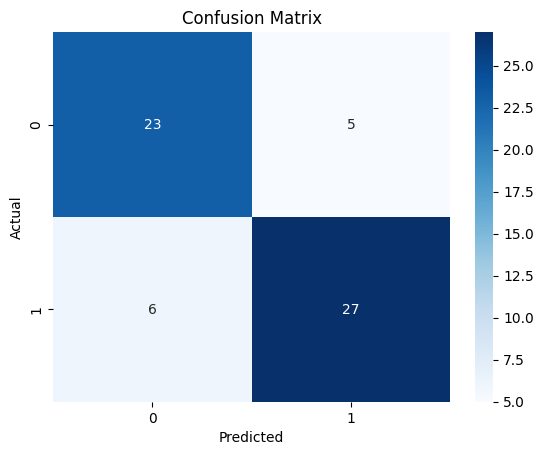

In [28]:
# making confusion matrix on test data

cm = confusion_matrix(Y_test, test_data_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Building the Predective system

In [29]:
import numpy as np

print("❤️ Heart Disease Prediction System ❤️")

# Taking user input
age = int(input("👤 Enter Age: "))
sex = int(input("⚧ Enter Sex (0 = Female, 1 = Male): "))
cp = int(input("💓 Enter Chest Pain Type (0-3): "))
trestbps = int(input("🩸 Enter Resting Blood Pressure: "))
chol = int(input("🥚 Enter Serum Cholesterol (mg/dl): "))
fbs = int(input("🍬 Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False): "))
restecg = int(input("📉 Resting ECG results (0-2): "))
thalach = int(input("🏃 Max Heart Rate Achieved: "))
exang = int(input("😮 Exercise Induced Angina (1 = Yes, 0 = No): "))
oldpeak = float(input("📉 ST Depression induced by exercise: "))
slope = int(input("📈 Slope of ST Segment (0-2): "))
ca = int(input("🩺 Number of major vessels (0-3): "))
thal = int(input("🧬 Thalassemia (1 = Normal, 2 = Fixed defect, 3 = Reversible defect): "))

# Prepare input data
input_data = np.array([[age, sex, trestbps, chol, fbs, thalach, exang, oldpeak,
                        cp, restecg, slope, ca, thal]])

# Predict
prediction = model.predict(input_data)

# Output result
if prediction[0] == 1:
    print("\n✅ Prediction: The person is LIKELY to have Heart Disease.")
else:
    print("\n✅ Prediction: The person is UNLIKELY to have Heart Disease.")


❤️ Heart Disease Prediction System ❤️
👤 Enter Age: 41
⚧ Enter Sex (0 = Female, 1 = Male): 0
💓 Enter Chest Pain Type (0-3): 1
🩸 Enter Resting Blood Pressure: 130
🥚 Enter Serum Cholesterol (mg/dl): 204
🍬 Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False): 0
📉 Resting ECG results (0-2): 0
🏃 Max Heart Rate Achieved: 172
😮 Exercise Induced Angina (1 = Yes, 0 = No): 0
📉 ST Depression induced by exercise: 1.4
📈 Slope of ST Segment (0-2): 2
🩺 Number of major vessels (0-3): 0
🧬 Thalassemia (1 = Normal, 2 = Fixed defect, 3 = Reversible defect): 2

✅ Prediction: The person is LIKELY to have Heart Disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
